### House prices predictive model

In [12]:
from functions.wrangling import preprocessing, c_concatenate
from functions.ML import train_test_split,UMAP_reduction, DBSCAN_cluster
from functions.plotting import scatter_plot
import pandas as pd 

In [2]:
train_prep = preprocessing(pd.read_csv("./data/train.csv") )
test_OG_prep = preprocessing(pd.read_csv( "./data/test.csv" ))

/home/marcello/miniconda3/envs/data_analysis/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/marcello/Data_analyses/house_price/functions/ML.py:42: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(data=df_umap, x='umap1', y='umap2',palette="pastel")


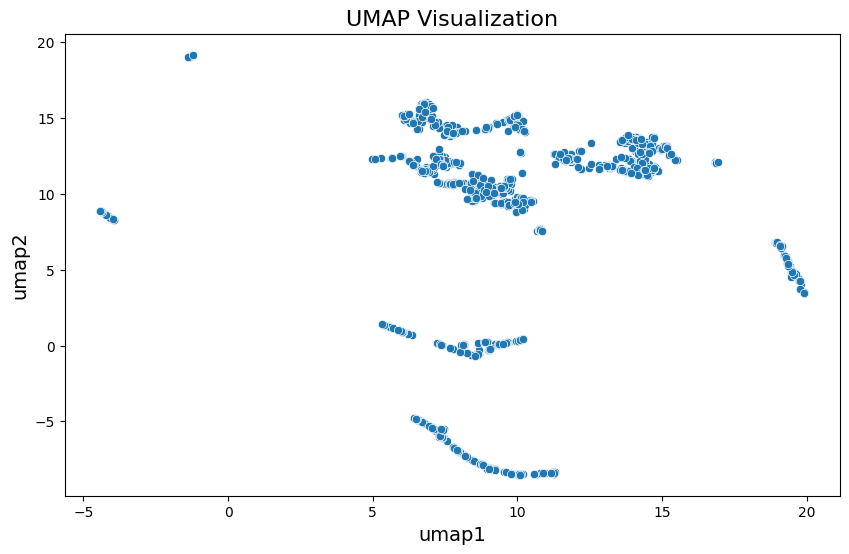

In [4]:
UMAP_train = UMAP_reduction(train_prep[0])
UMAP_conc= c_concatenate(train_prep[0],UMAP_train)

For data points such as neighborhood and year rebuilt there seems to be differential clustering, suggesting that there is an actual difference between different people groups.

In [ ]:
for column in UMAP_conc.columns:
    if column == "umap1" or column =="umap2":
        pass
    else:
        scatter_plot(UMAP_conc, ["umap1","umap2"],column)



Clustering here shows ten distinct group of people within the data structure, suggesting that there substantial differences in the dataset.

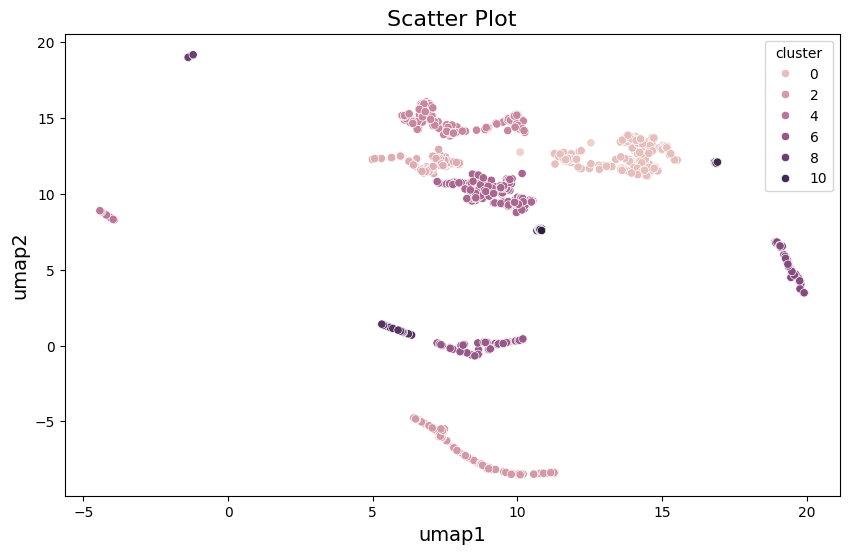

In [22]:
clustering = DBSCAN_cluster(UMAP_train)
UMAP_conc_clr = c_concatenate(train_prep[0],clustering)
scatter_plot(UMAP_conc_clr, ["umap1","umap2"],"cluster")

In [ ]:
#Add NN prediction